In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from scipy.integrate import quad
from scipy.special import jv, kv, iv, yv, jn_zeros
from scipy.optimize import newton
import matplotlib.image as mpimg 

%matplotlib inline

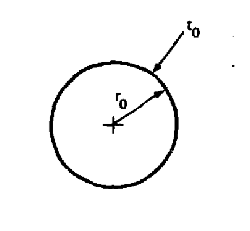

In [8]:
pic = mpimg.imread('schematic.png')
plt.imshow(pic)
plt.axis('off')
plt.show()

For this infinite cylinder with steady surface temperature problem, we are given the initial and boundary condition as shown below:

$$T(r,0) = T_i$$
$$T(r_0,t) = T_o$$

To approach this problem, I will use the conservation of energy equation for cylindrical coordinates as shown below:

$$\frac{1}{r} \frac{1}{dr} (r\frac{\partial T}{\partial r}) + \frac{\partial}{\partial \phi}(\frac{\partial T}{\partial \phi})\frac{1}{r^2} + \frac{\partial}{\partial z}(\frac{\partial T}{\partial z}) + \frac{\dot{q}}{k} = \frac{1}{\alpha}\frac{\partial T}{\partial t}$$

Employing the fact that we are only concerned with heat transfer along the radial direction, and the fact that we have no internal heat generation term, our governing equation reduces to

$$\frac{1}{r}\frac{\partial}{\partial r}(r \frac{\partial T}{\partial r}) = \frac{1}{\alpha}\frac{\partial T}{\partial t}$$

We simplify the problem by de-dimensionalizing it by letting:

$$u = \frac{T}{T_o}, s= \frac{r}{r_o}, Fo = \frac{\alpha t}{r_o^2}$$


$Fo$ here is called the __Fourier Number__, which is a measure of how much heat is being conducted as opposed to being "stored" in the material. A large Fourier number suggests that heat propagates quickly through that medium. 


Upon making the respective substitutions, we are left with the equation and initial/boundary conditions as shown below


$$\frac{1}{s} \frac{\partial}{\partial s}(s \frac{\partial u}{\partial s}) = \frac{\partial u}{\partial Fo}$$

$$BC: u = 1, s = 1 \space at \space t > 0$$

$$IC: u = T_o, s \space \epsilon \space (0,1) \space at \space t = 0$$

We notice here that even though we have de-dimensionalize the variabels, we are still left with a non-homogeneous boundary condition. In order to remove this, we do a neat little trick where we let 

$$v = u - 1$$

$$BC: v = 0, s = 1 \space at \space t > 0$$

$$IC: v = T_o - 1, s \space \epsilon \space (0,1) \space at \space t = 0$$



Now we can rewrite our differential equation as 

$$\frac{1}{s} \frac{\partial}{\partial s}(s \frac{\partial v}{\partial s}) = \frac{\partial v}{\partial Fo}$$



To solve this PDE, first define an operator as we would usually do with Fourier transforms

$$L[\phi] = \frac{\partial}{\partial s}(s \frac{\partial \phi}{\partial s}) = -\lambda s \phi$$

$$\phi = 0, s = 1$$


Expanding an simplifying, we arrive to following equation 


$$s^2 \frac{\partial^2 \phi}{\partial s^2} + s \frac{\partial \phi}{\partial s} + \lambda s \phi = 0$$


Wait a minute, this looks a little bit familiar... The solution to this type of differential equation is the Bessel function! Hence, our expression for $\phi$ looks like

$$\phi(s) = c_1J_o(\sqrt{\lambda} s) + c_2Y_o(\sqrt{\lambda} s)$$


We know that $\phi$ must be finite in the domain from 0 to 1, and hence we know that $c_2 = 0$. Hence the resulting expression for $\phi$ becomes 

$$\phi(s) = c_1 J_o(\sqrt{\lambda} s) $$

If c1 = 0, then we would just arrive at the trivial solution, hence we know that our solution to the eigenvalue equation 

$$ J_o(\sqrt{\lambda_n}) = 0$$

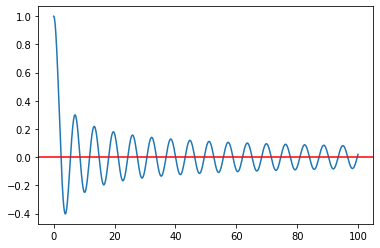

(0, 100)

In [13]:
x = np.linspace(0, 100, 1000)
bess2 = {}
bess2[0] = jv(0, x)

fig, ax = plt.subplots()

for i in bess2:
    ax.plot(x, bess2[i], label="order {}".format(i))

plt.axhline(y=0, color='r', linestyle = '-')
plt.show()
ax.set_ylim([-1.0, 1.5])
ax.set_xlim([0,100])

To obtain the normalization constant to get the complete expression for $\psi_s$ we can solve for $a_n$ in the following expression

$$\int_{0}^{1} {a_n}^2 \phi_n^2(s) \space ds = 1 $$

The textbook has outlined a calculation for this normalization, and by directly inferring from it, we are able to get the expression for $\phi_n(s)$ as

$$\phi_n(s) = \sqrt{2} \frac{J_o(\sqrt{\lambda_n}s)}{J_1(\sqrt{\lambda_n})} where \space n=1,2,3...$$

Next, we do something similar like we did with Fourier transforms, where we multiply each of the quantities in the differential equation with our expression for $\phi_n(s)$ and take the integral from zero to 1 (in this case). We do something similar, and we call it the __Finite Hankel Transform__. 

The __Finite Hankel Transform (FHT)__ , for some arbitrary function A is defined as 

$$\mathscr{H}[A[s,t]] = \int_{0}^{1} s \space \phi_n(s) \space A[s,t] \space ds = A_n(t)$$

We can rewrite the differential equation as the following

$$ \frac{\partial}{\partial s}(s \frac{\partial v}{\partial s}) = s \frac{\partial v}{\partial Fo}$$

We can take the Finite Hankel Transform of the LHS 

$$\int_{0}^{1} \frac{\partial}{\partial s}(s \frac{\partial v}{\partial s}) s \space \phi_n(s) \space ds = \int_{0}^{1} v[-\lambda_n s \space \phi_n(s)] \space ds = -\lambda_nv_n(t) $$

Taking the FHT of the RHS 
$$\int_{0}^{1} s \space \phi_n(s) \frac{\partial v}{\partial Fo} ds = \frac{\partial}{\partial Fo} \int_{0}^{1} s \space \phi_n(s) v ds = \frac{dv_n}{dFo}$$

With the transformation, our PDE turns into the ODE below

$$\frac{dv_n}{dFo} = -\lambda_nv_n$$

The solution to the ODE looks like the following

$$v_n = v(0)e^{-\lambda_nFo}$$


To get our final expression for $v(s,Fo)$, we need to take the inverse Hankel transform which is defined as 

$$\mathscr{H}^{-1}[v[s,Fo]] = \sum_{n=1}^\infty v(s,Fo) \phi_n(s) = \sum_{n=1}^\infty v(0)e^{-\lambda_nFo} \sqrt{2} \frac{J_o(\sqrt{\lambda_n}s)}{J_1(\sqrt{\lambda_n})}$$

To get to the expression in the solutions manual, we need to get an expression for T instead of v. First we get the expression for $v(0)$ in terms of T. 

$$v(0) = \int_{0}^{1}\bigg[\frac{T_i}{T_o} - 1\bigg]s \sqrt{2} \frac{J_o(\sqrt{\lambda_n}s)}{J_1(\sqrt{\lambda_n})} ds = \bigg[\frac{T_i}{T_o} - 1\bigg] \frac{\sqrt{2}}{J_1(\sqrt{\lambda_n})} \int_{0}^{1} s J_o(\sqrt{\lambda_n}s) ds$$

$$ = \bigg[\frac{T_i}{T_o} - 1\bigg] \frac{\sqrt{2}}{J_1(\sqrt{\lambda_n})} \bigg[\frac{s J_1(\sqrt{\lambda_n}s) }{\sqrt{\lambda_n}}\bigg]_{0}^{1}$$

$$ = \bigg[\frac{T_i}{T_o} - 1\bigg] \sqrt{\frac{2}{\lambda_n}}$$

Putting this into our final expression for T, we can get

$$\frac{T}{T_o} - 1 = \sum_{n=1}^\infty \bigg[\frac{T_i}{T_o} - 1\bigg] \sqrt{\frac{2}{\lambda_n}} e^{-\lambda_nFo}\sqrt{2} \frac{J_o(\sqrt{\lambda_n} \frac{r}{r_o})}{J_1(\sqrt{\lambda_n})}$$

$$T = T_o + 2[T_i - T_o] \sum_{n=1}^\infty \frac{1}{\sqrt{\lambda_n}} e^{-\lambda_nFo} \frac{J_o(\sqrt{\lambda_n} \frac{r}{r_o})}{J_1(\sqrt{\lambda_n})}$$

Replacing the Fourier Number in terms of t

$$T = T_o + 2[T_i - T_o] \sum_{n=1}^\infty \frac{1}{\sqrt{\lambda_n}} e^{-\lambda_n \frac{\alpha t}{r_o^2} } \frac{J_o(\sqrt{\lambda_n} \frac{r}{r_o})}{J_1(\sqrt{\lambda_n})}$$


For the graphs below, we plotted 
$$\frac{T - T_o}{T_i - T_o} = 2\sum_{n=1}^\infty \frac{1}{\sqrt{\lambda_n}} e^{-\lambda_n \frac{\alpha t}{r_o^2} } \frac{J_o(\sqrt{\lambda_n} \frac{r}{r_o})}{J_1(\sqrt{\lambda_n})}$$

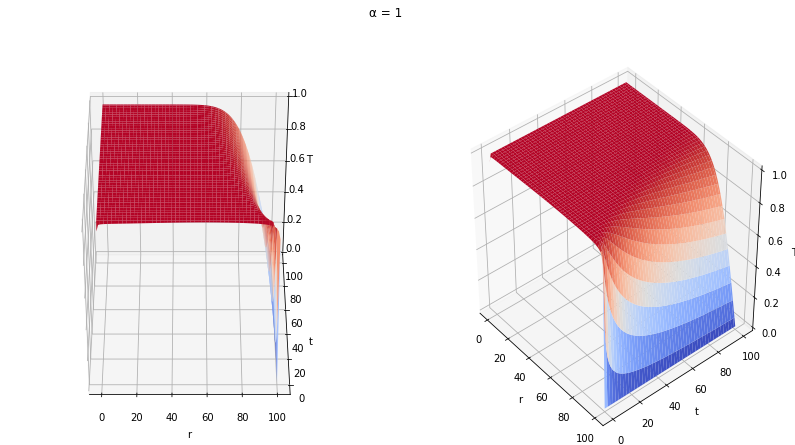

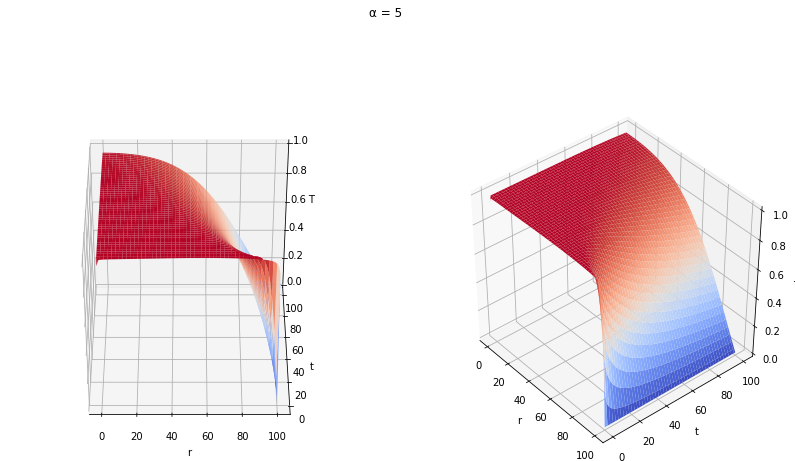

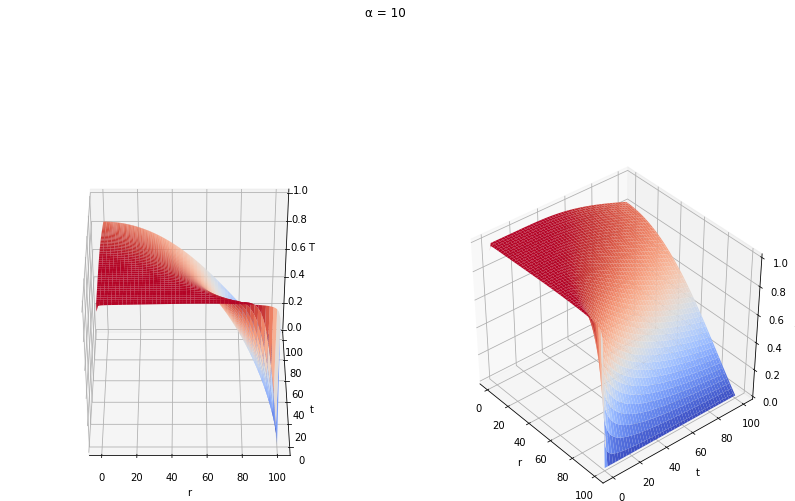

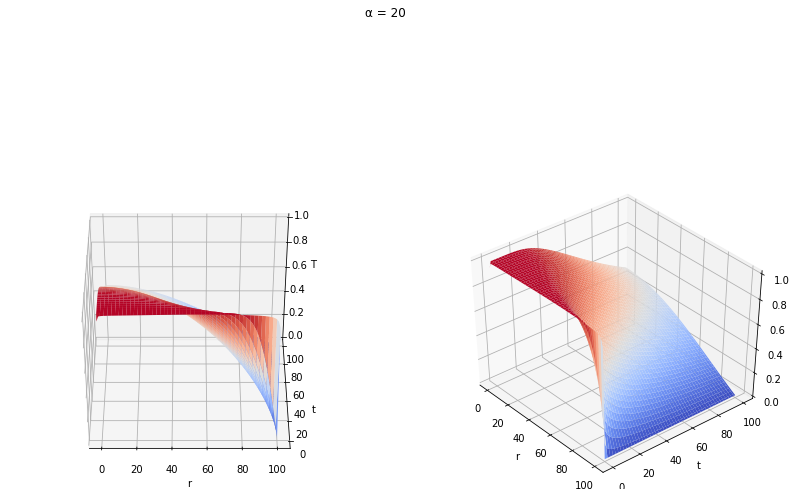

In [14]:
To = 10
Ti = 30 
alpha = 1
Ro = 100
r = np.linspace(0, Ro, 100)
t = np.linspace(0, 100, 100)
T = np.zeros((r.shape[0], t.shape[0]))

zero_of_j0 = jn_zeros(0,200)**2

rv, tv = np.meshgrid(r, t)

for n, lambdai in enumerate(zero_of_j0):
    T += + 2/((lambdai)**0.5)*np.exp(-lambdai * alpha * tv / Ro**2)*(jv(0,((lambdai)**0.5)*rv/Ro))/(jv(1,(lambdai)**0.5))

fig = plt.figure(figsize=(14,7))
fig.suptitle('α = 1')
ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(rv, tv, T, cmap=cm.coolwarm)

ax.set_xlabel('r')
ax.set_ylabel('t')
ax.set_zlabel('T')
ax.view_init(elev=40, azim=-90)

ax = fig.add_subplot(1,2,2, projection='3d')
ax.plot_surface(rv, tv, T, cmap=cm.coolwarm)

ax.set_xlabel('r')
ax.set_ylabel('t')
ax.set_zlabel('T')
ax.view_init(elev=40, azim=-40)

fig.suptitle('α = 1')
                

alpha1 = 5

T1 = np.zeros((r.shape[0], t.shape[0]))

rv, tv = np.meshgrid(r, t)

for n, lambdai in enumerate(zero_of_j0):
    T1 += + 2/((lambdai)**0.5)*np.exp(-lambdai * alpha1 * tv / Ro**2)*(jv(0,((lambdai)**0.5)*rv/Ro))/(jv(1,(lambdai)**0.5))

fig = plt.figure(figsize=(14,14))
fig.suptitle('α = 5')
ax = fig.add_subplot(2,2,1, projection='3d')
ax.plot_surface(rv, tv, T1, cmap=cm.coolwarm)

ax.set_xlabel('r')
ax.set_ylabel('t')
ax.set_zlabel('T')
ax.view_init(elev=40, azim=-90)

ax = fig.add_subplot(2,2,2, projection='3d')
ax.plot_surface(rv, tv, T1, cmap=cm.coolwarm)

ax.set_xlabel('r')
ax.set_ylabel('t')
ax.set_zlabel('T')
ax.view_init(elev=40, azim=-40)



alpha2 = 10

T2 = np.zeros((r.shape[0], t.shape[0]))

rv, tv = np.meshgrid(r, t)

for n, lambdai in enumerate(zero_of_j0):
    T2 += + 2/((lambdai)**0.5)*np.exp(-lambdai * alpha2 * tv / Ro**2)*(jv(0,((lambdai)**0.5)*rv/Ro))/(jv(1,(lambdai)**0.5))

fig = plt.figure(figsize=(14,21))
fig.suptitle('α = 10')
ax = fig.add_subplot(3,2,1, projection='3d')
ax.plot_surface(rv, tv, T2, cmap=cm.coolwarm)

ax.set_xlabel('r')
ax.set_ylabel('t')
ax.set_zlabel('T')
ax.view_init(elev=40, azim=-90)

ax = fig.add_subplot(3,2,2, projection='3d')
ax.plot_surface(rv, tv, T2, cmap=cm.coolwarm)

ax.set_xlabel('r')
ax.set_ylabel('t')
ax.set_zlabel('T')
ax.view_init(elev=40, azim=-40)


alpha3 = 20

T3 = np.zeros((r.shape[0], t.shape[0]))

rv, tv = np.meshgrid(r, t)

for n, lambdai in enumerate(zero_of_j0):
    T3 += + 2/((lambdai)**0.5)*np.exp(-lambdai * alpha3 * tv / Ro**2)*(jv(0,((lambdai)**0.5)*rv/Ro))/(jv(1,(lambdai)**0.5))

fig = plt.figure(figsize=(14,25))
fig.suptitle('α = 20')
ax = fig.add_subplot(4,2,1, projection='3d')
ax.plot_surface(rv, tv, T3, cmap=cm.coolwarm)

ax.set_xlabel('r')
ax.set_ylabel('t')
ax.set_zlabel('T')
ax.view_init(elev=40, azim=-90)

ax = fig.add_subplot(4,2,2, projection='3d')
ax.plot_surface(rv, tv, T3, cmap=cm.coolwarm)

ax.set_xlabel('r')
ax.set_ylabel('t')
ax.set_zlabel('T')
ax.view_init(elev=40, azim=-40)


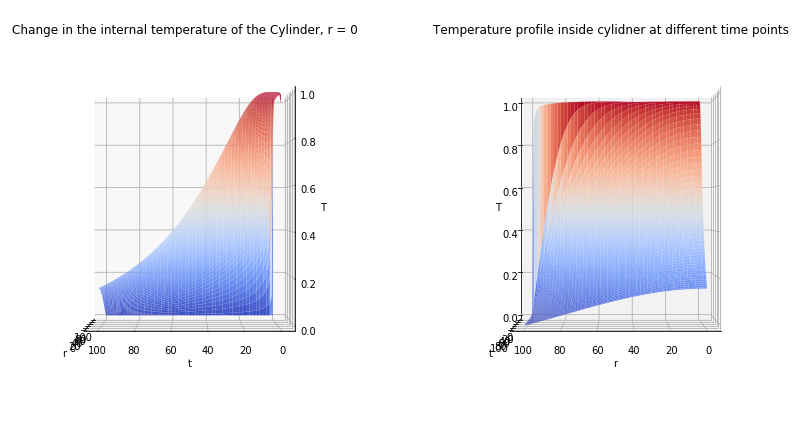

In [92]:
To = 10
Ti = 30 
Ro = 100
r = np.linspace(0, Ro, 100)
t = np.linspace(0, 100, 100)
T = np.zeros((r.shape[0], t.shape[0]))
alpha3 = 40

T3 = np.zeros((r.shape[0], t.shape[0]))

rv, tv = np.meshgrid(r, t)

for n, lambdai in enumerate(zero_of_j0):
    T3 += + 2/((lambdai)**0.5)*np.exp(-lambdai * alpha3 * tv / Ro**2)*(jv(0,((lambdai)**0.5)*rv/Ro))/(jv(1,(lambdai)**0.5))

fig = plt.figure(figsize=(14,35))
ax = fig.add_subplot(4,2,1, projection='3d')
ax.plot_surface(rv, tv, T3, cmap=cm.coolwarm)
ax.set_title('Change in the internal temperature of the Cylinder, r = 0')
ax.set_xlabel('r')
ax.set_ylabel('t')
ax.set_zlabel('T')
ax.view_init(elev=0, azim=-180)

ax = fig.add_subplot(4,2,2, projection='3d')
ax.plot_surface(rv, tv, T3, cmap=cm.coolwarm)
ax.set_title('Temperature profile inside cylidner at different time points')
ax.set_xlabel('r')
ax.set_ylabel('t')
ax.set_zlabel('T')
ax.view_init(elev=0, azim=-270)